# Cannabis Health Outcomes Analysis
## Data Source
2024 Canadian Cannabis Survey (PUMF) — Statistics Canada
11,666 respondents, aged 16+, across all Canadian provinces


### Key Columns

| Column | Description | Values |
|--------|-------------|--------|
| `canpurpose_dv` | Purpose of use | 0=no use,1=non-medical, 2=both, 3=medical, -7=N/A |
| `age6` | Age group | 1=16-19, 2=20-24, 3=25-34, 4=35-44, 5=45-54, 6=55+ |
| `sex` | Gender | 1=male, 2=female |
| `education3` | Education level | 1=high school or less, 2=trades/college, 3=bachelor's or more, -8= not applicable |
| `health_physical` | Physical health | 1=excellent, 2=very good, 3=good, 4=fair, 5=poor, -8=not applicable |
| `health_mental` | Mental health | 1=excellent, 2=very good, 3=good, 4=fair, 5=poor, -8=not applicable |
| `use_modes_smoke` | Smokes cannabis | 0=no, 1=yes, -7=missing |
| `use_modes_vape` | Vapes cannabis | 0=no, 1=yes, -7=missing |
| `use_modes_edible` | Edibles | 0=no, 1=yes, -7=missing |
| `use_modes_bev` | Beverages | 0=no, 1=yes, -7=missing |
| `use_modes_oil` | Oils/tinctures | 0=no, 1=yes, -7=missing |
| `use_modes_dab` | Concentrates | 0=no, 1=yes, -7=missing |
| `use_modes_topical` | Topical | 0=no, 1=yes, -7=missing |
| `use_freq_rec` | Frequency of recreational use | 1=less than monthly, 2=monthly, 3=2-3x/month, 4=1-2x/week, 5=3-4x/week, 6=5-6x/week, 7=daily, -7=missing |
| `use_freq_herb` | Frequency of dried herb use | 1=less than monthly, 2=monthly, 3=2-3x/month, 4=1-2x/week, 5=3-4x/week, 6=5-6x/week, 7=daily, -7=missing |
| `use_freq_vape` | Frequency of vaping | 1=less than monthly, 2=monthly, 3=2-3x/month, 4=1-2x/week, 5=3-4x/week, 6=5-6x/week, 7=daily, -7=missing |
| `use_freq_edible` | Frequency of edible use | 1=less than monthly, 2=monthly, 3=2-3x/month, 4=1-2x/week, 5=3-4x/week, 6=5-6x/week, 7=daily, -7=missing |
| `use_freq_bev` | Frequency of beverage use | 1=less than monthly, 2=monthly, 3=2-3x/month, 4=1-2x/week, 5=3-4x/week, 6=5-6x/week, 7=daily, -7=missing |
| `symp_anxiety_dv` | Anxiety | 0=no, 1=yes, -7=not applicable |
| `symp_depression_dv` | Depression | 0=no, 1=yes, -7=not applicable |
| `symp_chronicpain_dv` | Chronic pain | 0=no, 1=yes, -7=not applicable |
| `symp_acutepain_dv` | Acute pain | 0=no, 1=yes, -7=not applicable |
| `symp_sleep_dv` | Sleep problems | 0=no, 1=yes, -7=not applicable |
| `symp_ptsd_dv` | PTSD | 0=no, 1=yes, -7=not applicable |
| `symp_nausea_dv` | Nausea | 0=no, 1=yes, -7=not applicable |
| `symp_arthritis_dv` | Arthritis | 0=no, 1=yes, -7=not applicable |
| `symp_cancer_dv` | Cancer | 0=no, 1=yes, -7=not applicable |
| `symp_opiwithdrawal_dv` | Opioid withdrawal | 0=no, 1=yes, -7=not applicable |
| `belief_smoke` | Belief: smoking harm | 1=yes, 2=no, 3=not sure, -7=not applicable |
| `belief_vapour` | Belief: vaping harm | 1=yes, 2=no, 3=not sure, -7=not applicable |
| `belief_edible` | Can it take up to 4 hours to feel effects from edibles? | 1=yes, 2=no, 3=not sure, -7=not applicable |
| `belief_thc` | Does lower THC lead to greater impairment? | 1=yes, 2=no, 3=not sure, -7=not applicable |
| `belief_habit` | Can cannabis become habit forming? | 1=yes, 2=no, 3=not sure, -7=not applicable |
| `sample_weight` | Survey weight | continuous |

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("Greens_d")

print("Libraries loaded successfully")

Libraries loaded successfully


In [52]:
# Load the dataset
df = pd.read_csv('ccs_pumf_2024-002.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 10 column names:\n{list(df.columns[:10])}")
df.head()

Dataset shape: (11666, 596)

First 10 column names:
['seq_ID', 'wave', 'sample_weight', 'age6', 'sex', 'sexuality_recode', 'community_size', 'prov', 'race_white', 'health_physical']


,seq_ID,wave,sample_weight,age6,sex,sexuality_recode,community_size,prov,race_white,health_physical,...,med_reduc,pain_opi_dv,pain_nonopi_dv,anti_inflam_dv,sedative_dv,anti_depress_dv,stimulant_dv,anti_convuls_dv,othermed_dv,med_reduc_sleep_dv
0,1,7,2622.4390,2,2,1,1,7,1,2,...,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7
1,2,7,1317.9545,4,1,1,-7,5,1,2,...,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7
2,3,7,1547.9545,1,1,1,1,1,0,2,...,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7
3,4,7,3050.0000,1,2,1,2,7,1,4,...,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7
4,5,7,2475.0746,4,1,2,2,2,0,2,...,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7


In [53]:

print("=== DATASET OVERVIEW ===")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

print("\n=== DATA TYPES ===")
print(df.dtypes.value_counts())

print("\n=== MISSING VALUES (top 10 columns) ===")
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False).head(10))

print("\n=== KEY COLUMNS SUMMARY ===")
key_cols = ['age6', 'sex', 'health_physical', 'sample_weight']
print(df[key_cols].describe())

=== DATASET OVERVIEW ===
Rows: 11666
Columns: 596

=== DATA TYPES ===
int64      586
float64     10
dtype: int64

=== MISSING VALUES (top 10 columns) ===
Series([], dtype: int64)

=== KEY COLUMNS SUMMARY ===
               age6          sex  health_physical  sample_weight
count  11666.000000  11666.00000     11666.000000   11666.000000
mean       4.436053      1.50120         2.402880    2620.582468
std        1.631106      0.50002         1.166707    1291.789504
min        1.000000      1.00000        -8.000000     170.205500
25%        3.000000      1.00000         2.000000    1705.518900
50%        5.000000      2.00000         2.000000    2421.766900
75%        6.000000      2.00000         3.000000    3594.256200
max        6.000000      2.00000         5.000000    6154.062500


In [54]:
cannabis_cols = [col for col in df.columns if 'cannabis' in col.lower() or 'marij' in col.lower()]
print("=== CANNABIS COLUMNS ===")
print(cannabis_cols)

# Search for medical/health related columns  
medical_cols = [col for col in df.columns if 'medical' in col.lower() or 'health' in col.lower()]
print("\n=== MEDICAL/HEALTH COLUMNS ===")
print(medical_cols)

# Search for reason/purpose columns
reason_cols = [col for col in df.columns if 'reason' in col.lower() or 'purpose' in col.lower() or 'use' in col.lower()]
print("\n=== REASON/USE COLUMNS ===")
print(reason_cols[:20])

=== CANNABIS COLUMNS ===
[]

=== MEDICAL/HEALTH COLUMNS ===
['health_physical', 'health_mental', 'educ_health_dv', 'more_health_dv', 'more_medical_dv', 'info_health_dv', 'impact_health', 'assist_detail_health']

=== REASON/USE COLUMNS ===
['acc2_nausea', 'ever_use', 'anyuse_dv', 'canpurpose_dv', 'use_freq_rec', 'use_modes_smoke', 'use_modes_edible', 'use_modes_bev', 'use_modes_vape', 'use_modes_oil', 'use_modes_dab', 'use_modes_topical', 'preroll_infused', 'use_freq_herb', 'use_freq_hash', 'use_freq_oil', 'use_freq_vape', 'use_freq_concen', 'use_freq_edible', 'use_freq_bev']


In [55]:
search_terms = ['medical', 'reason', 'frequency', 'route', 'smoke', 'vape', 
                'edible', 'pain', 'anxiety', 'harm', 'benefit', 'health', 'vapour', 'belief', 'education']

for term in search_terms:
    matches = [col for col in df.columns if term in col.lower()]
    if matches:
        print(f"\n=== '{term}' columns ===")
        print(matches[:8])


=== 'medical' columns ===
['more_medical_dv']

=== 'smoke' columns ===
['accept_cansmoke2', 'risk_cansmoke2', 'warn_recall_smoke', 'belief_smoke', 'use_modes_smoke', 'driver_smoke_rev', 'driver_smoke_thc']

=== 'vape' columns ===
['accept_canliqvape2', 'accept_candryvape2', 'risk_canliqvape2', 'risk_candryvape2', 'acc4_vape_dv', 'use_modes_vape', 'vape_herb', 'vape_liquid']

=== 'edible' columns ===
['warn_recall_edible', 'belief_edible', 'edible_home_me', 'edible_home_else', 'edible_home_no', 'edible_home_dk', 'edible_where_grown', 'edible_where_buy']

=== 'pain' columns ===
['symp_acutepain_dv', 'symp_chronicpain_dv', 'symp_other_pain_dv', 'pain_opi_dv', 'pain_nonopi_dv']

=== 'anxiety' columns ===
['symp_anxiety_dv']

=== 'harm' columns ===
['ad_pharm_dv', 'more_harm_dv']

=== 'health' columns ===
['health_physical', 'health_mental', 'educ_health_dv', 'more_health_dv', 'info_health_dv', 'impact_health', 'assist_detail_health']

=== 'vapour' columns ===
['belief_vapour']

=== 'belie

In [56]:
# Find education columns
edu_cols = [col for col in df.columns if 'educ' in col.lower()]
print("Education columns:")
print(edu_cols)

Education columns:
['education3', 'educ_school_dv', 'educ_social_dv', 'educ_web_dv', 'educ_event_dv', 'educ_kiosk_dv', 'educ_leg_store_dv', 'educ_poster_dv', 'educ_health_dv', 'educ_print_dv', 'educ_tv_dv', 'educ_ill_store_dv', 'educ_org_dv', 'educ_work_dv', 'educ_other_dv', 'educ_none_dv', 'educ_cred', 'med_reduc', 'med_reduc_sleep_dv']


In [76]:
key_cols = [
    # Target variable
    'canpurpose_dv',
    
    # Demographics
    'age6', 'sex', 'education3',
    
    # Health status
    'health_physical', 'health_mental',
    
    # Route of administration
    'use_modes_smoke', 'use_modes_vape', 'use_modes_edible',
    'use_modes_bev', 'use_modes_oil', 'use_modes_dab', 'use_modes_topical',
    
    # Frequency of use
    'use_freq_rec', 'use_freq_herb', 'use_freq_vape',
    'use_freq_edible', 'use_freq_bev', 'use_freq_med',
   
    # Symptoms treated
    'symp_anxiety_dv', 'symp_depression_dv', 'symp_chronicpain_dv',
    'symp_acutepain_dv', 'symp_sleep_dv', 'symp_ptsd_dv',
    'symp_nausea_dv', 'symp_arthritis_dv', 'symp_cancer_dv',
    'symp_opiwithdrawal_dv', 'symp_headache_dv', 'symp_gastro_dv', 'symp_adhd_dv', 'symp_spasms_dv',
    
    # Beliefs
    'belief_smoke', 'belief_vapour', 'belief_edible',
    'belief_thc', 'belief_habit',
    
    # Survey weight
    'sample_weight'
]

# Create working dataframe with just our key columns
df_clean = df[key_cols].copy()
print(f"Working dataframe shape: {df_clean.shape}")
print(f"\ncanpurpose_dv distribution:")
print(df_clean['canpurpose_dv'].value_counts().sort_index())

Working dataframe shape: (11666, 39)

canpurpose_dv distribution:
-7      89
 0    8026
 1    2381
 2     671
 3     499
Name: canpurpose_dv, dtype: int64


In [77]:
df_clean = df_clean.replace(-7, np.nan)
df_clean = df_clean.replace(-8, np.nan)

# Step 2 — Keep only cannabis users (exclude non-users and missing)
df_users = df_clean[df_clean['canpurpose_dv'].isin([1, 2, 3])].copy()

# Step 3 — Create readable labels for purpose
purpose_labels = {1: 'Non-Medical', 2: 'Both', 3: 'Medical'}
df_users['purpose'] = df_users['canpurpose_dv'].map(purpose_labels)

# Check results
print(f"Cannabis users in sample: {len(df_users)}")
print(f"\nPurpose distribution:")
print(df_users['purpose'].value_counts())

Cannabis users in sample: 3551

Purpose distribution:
Non-Medical    2381
Both            671
Medical         499
Name: purpose, dtype: int64


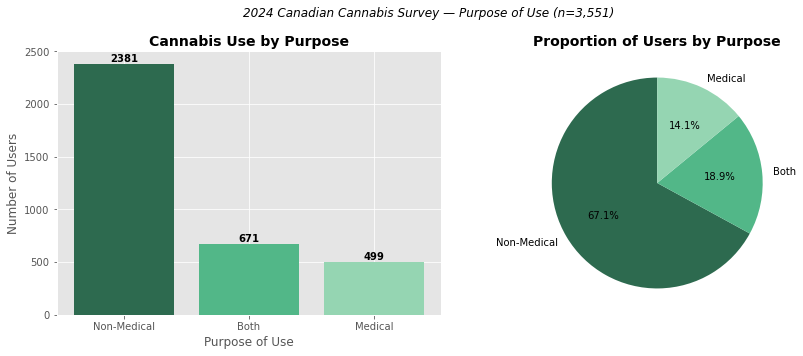

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Chart 1 — Bar chart
purpose_counts = df_users['purpose'].value_counts()
colors = ['#2d6a4f', '#52b788', '#95d5b2']

axes[0].bar(purpose_counts.index, purpose_counts.values, color=colors)
axes[0].set_title('Cannabis Use by Purpose', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Purpose of Use')
axes[0].set_ylabel('Number of Users')
for i, v in enumerate(purpose_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Chart 2 — Pie chart
axes[1].pie(purpose_counts.values, 
            labels=purpose_counts.index,
            colors=colors,
            autopct='%1.1f%%',
            startangle=90)
axes[1].set_title('Proportion of Users by Purpose', fontsize=14, fontweight='bold')

plt.suptitle('2024 Canadian Cannabis Survey — Purpose of Use (n=3,551)', 
             fontsize=12, style='italic')
plt.tight_layout()
plt.savefig('fig1_purpose_distribution.png', dpi=150, bbox_inches='tight')
plt.show()



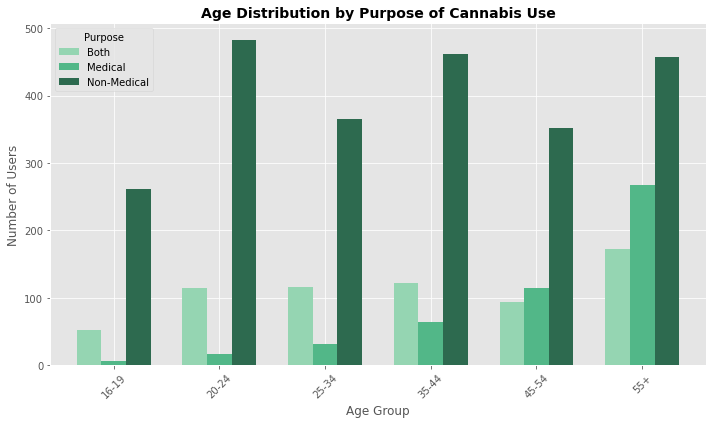

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create age labels
age_labels = {
    1: '16-19', 2: '20-24', 3: '25-34',
    4: '35-44', 5: '45-54', 6: '55+'
}
df_users['age_label'] = df_users['age6'].map(age_labels)

# Count by age and purpose
age_purpose = df_users.groupby(['age_label', 'purpose']).size().unstack()
age_purpose = age_purpose.reindex(['16-19','20-24','25-34','35-44','45-54','55+'])

# Plot
age_purpose.plot(kind='bar', ax=ax, 
                 color=['#95d5b2', '#52b788', '#2d6a4f'],
                 width=0.7)

ax.set_title('Age Distribution by Purpose of Cannabis Use', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Users')
ax.legend(title='Purpose')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('fig2_age_by_purpose.png', dpi=150, bbox_inches='tight')
plt.show()



## Finding 1 — Age and Purpose of Use
Cannabis use for medical purposes increases significantly with age.
Users aged 45-54 and 55+ show notably higher rates of medical use
compared to younger age groups, consistent with the higher prevalence
of chronic conditions in older populations.

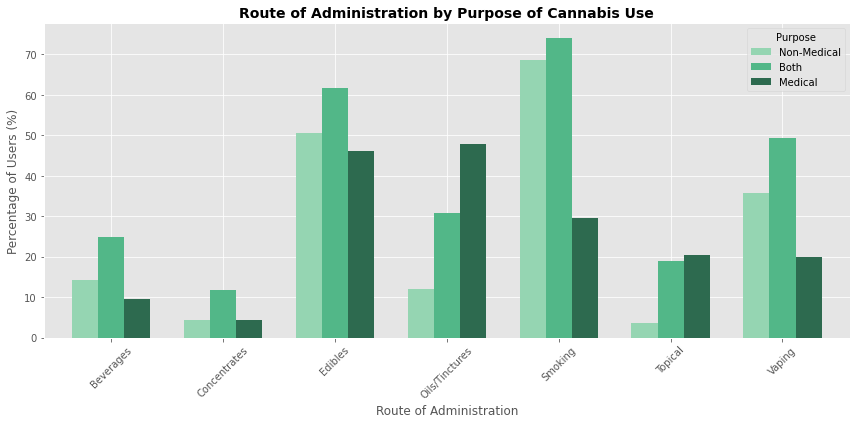

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))

# Route of administration columns and clean labels
route_cols = {
    'use_modes_smoke': 'Smoking',
    'use_modes_vape': 'Vaping',
    'use_modes_edible': 'Edibles',
    'use_modes_bev': 'Beverages',
    'use_modes_oil': 'Oils/Tinctures',
    'use_modes_dab': 'Concentrates',
    'use_modes_topical': 'Topical'
}

# Calculate percentage using each route by purpose
route_data = []
for col, label in route_cols.items():
    for purpose in ['Non-Medical', 'Both', 'Medical']:
        group = df_users[df_users['purpose'] == purpose]
        pct = group[col].mean() * 100
        route_data.append({'Route': label, 'Purpose': purpose, 'Percentage': pct})

route_df = pd.DataFrame(route_data)

# Pivot and plot
route_pivot = route_df.pivot(index='Route', columns='Purpose', values='Percentage')
route_pivot = route_pivot[['Non-Medical', 'Both', 'Medical']]

route_pivot.plot(kind='bar', ax=ax,
                color=['#95d5b2', '#52b788', '#2d6a4f'],
                width=0.7)

ax.set_title('Route of Administration by Purpose of Cannabis Use',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Route of Administration')
ax.set_ylabel('Percentage of Users (%)')
ax.legend(title='Purpose')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('fig3_route_by_purpose.png', dpi=150, bbox_inches='tight')
plt.show()



In [62]:
# Quick count — concentrates by purpose
for purpose in ['Non-Medical', 'Both', 'Medical']:
    group = df_users[df_users['purpose'] == purpose]
    count = group['use_modes_dab'].sum()
    total = group['use_modes_dab'].notna().sum()
    pct = (count/total)*100
    print(f"{purpose}: {int(count)} out of {total} ({pct:.1f}%)")

Non-Medical: 99 out of 2345 (4.2%)
Both: 78 out of 664 (11.7%)
Medical: 21 out of 479 (4.4%)


## Finding 2 — Route of Administration by Purpose
Oils/tinctures and topical application are notably more common among 
medical users, consistent with their use for precise dosing and 
localized pain relief respectively. 

Concentrate use is nearly identical between non-medical (99 users, 4.2%) 
and medical users (21 users, 4.4%), suggesting high-potency products 
serve distinct but equally compelling purposes across user types. 
The "Both" group shows notably higher concentrate use (78 users, 11.7%), 
consistent with their more intensive overall cannabis use patterns.

This has direct implications for cannabis product regulation and 
clinical recommendation practices.

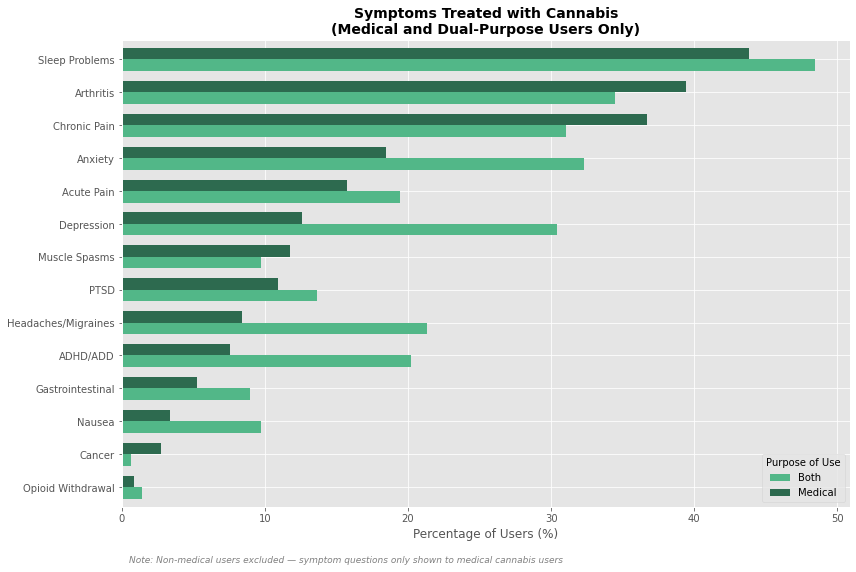

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))

symp_cols = {
    'symp_anxiety_dv': 'Anxiety',
    'symp_depression_dv': 'Depression',
    'symp_chronicpain_dv': 'Chronic Pain',
    'symp_acutepain_dv': 'Acute Pain',
    'symp_sleep_dv': 'Sleep Problems',
    'symp_ptsd_dv': 'PTSD',
    'symp_nausea_dv': 'Nausea',
    'symp_arthritis_dv': 'Arthritis',
    'symp_cancer_dv': 'Cancer',
    'symp_opiwithdrawal_dv': 'Opioid Withdrawal',
    'symp_headache_dv': 'Headaches/Migraines',
    'symp_gastro_dv': 'Gastrointestinal',
    'symp_adhd_dv': 'ADHD/ADD',
    'symp_spasms_dv': 'Muscle Spasms'
}

# Filter to medical users only
df_medical = df_users[df_users['purpose'].isin(['Medical', 'Both'])].copy()

# Calculate percentage for each symptom by purpose
symp_data = []
for col, label in symp_cols.items():
    for purpose in ['Both', 'Medical']:
        group = df_medical[df_medical['purpose'] == purpose]
        pct = group[col].mean() * 100
        symp_data.append({
            'Symptom': label, 
            'Purpose': purpose, 
            'Percentage': pct
        })

symp_df = pd.DataFrame(symp_data)

# Pivot and sort by Medical percentage
symp_pivot = symp_df.pivot(index='Symptom', columns='Purpose', values='Percentage')
symp_pivot = symp_pivot.sort_values('Medical', ascending=True)

symp_pivot.plot(kind='barh', ax=ax,
                color=['#52b788', '#2d6a4f'],
                width=0.7)

ax.set_title('Symptoms Treated with Cannabis\n(Medical and Dual-Purpose Users Only)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage of Users (%)')
ax.set_ylabel('')
ax.legend(title='Purpose of Use')

# Add note about who is excluded
ax.annotate('Note: Non-medical users excluded — symptom questions only shown to medical cannabis users',
            xy=(0.01, -0.12), xycoords='axes fraction',
            fontsize=9, style='italic', color='gray')

plt.tight_layout()
plt.savefig('fig4_symptoms_by_purpose.png', dpi=150, bbox_inches='tight')
plt.show()



In [64]:
# Physical counts for symptoms by purpose
for col, label in symp_cols.items():
    if col in df_users.columns:
        print(f"\n{label}:")
        for purpose in ['Both', 'Medical']:
            group = df_medical[df_medical['purpose'] == purpose]
            count = int(group[col].sum())
            total = int(group[col].notna().sum())
            pct = (count/total)*100 if total > 0 else 0
            print(f"  {purpose}: {count} out of {total} ({pct:.1f}%)")


Anxiety:
  Both: 206 out of 638 (32.3%)
  Medical: 88 out of 477 (18.4%)

Depression:
  Both: 194 out of 638 (30.4%)
  Medical: 60 out of 477 (12.6%)

Chronic Pain:
  Both: 198 out of 638 (31.0%)
  Medical: 175 out of 477 (36.7%)

Acute Pain:
  Both: 124 out of 638 (19.4%)
  Medical: 75 out of 477 (15.7%)

Sleep Problems:
  Both: 309 out of 638 (48.4%)
  Medical: 209 out of 477 (43.8%)

PTSD:
  Both: 87 out of 638 (13.6%)
  Medical: 52 out of 477 (10.9%)

Nausea:
  Both: 62 out of 638 (9.7%)
  Medical: 16 out of 477 (3.4%)

Arthritis:
  Both: 220 out of 638 (34.5%)
  Medical: 188 out of 477 (39.4%)

Cancer:
  Both: 4 out of 638 (0.6%)
  Medical: 13 out of 477 (2.7%)

Opioid Withdrawal:
  Both: 9 out of 638 (1.4%)
  Medical: 4 out of 477 (0.8%)

Headaches/Migraines:
  Both: 136 out of 638 (21.3%)
  Medical: 40 out of 477 (8.4%)

Gastrointestinal:
  Both: 57 out of 638 (8.9%)
  Medical: 25 out of 477 (5.2%)

ADHD/ADD:
  Both: 129 out of 638 (20.2%)
  Medical: 36 out of 477 (7.5%)

Muscl

## Finding 3 — Symptom Profiles Differ Between Medical and Dual-Purpose Users

Medical-only users show higher rates of serious physical conditions:
- Chronic pain (36.7% vs 31.0%)
- Arthritis (39.4% vs 34.5%)
- Cancer (2.7% vs 0.6%)

Dual-purpose users show higher rates of mental health conditions:
- Anxiety (32.3% vs 18.4%)
- Depression (30.4% vs 12.6%)
- ADHD (20.2% vs 7.5%)

Sleep problems are the most prevalent condition across both groups
(Medical: 43.8%, Both: 48.4%), suggesting sleep is a primary 
driver of medical cannabis use regardless of recreational use status.

This pattern suggests medical-only users may have more severe or 
chronic physical conditions, while dual-purpose users more commonly 
use cannabis to manage mental health symptoms alongside recreational use.

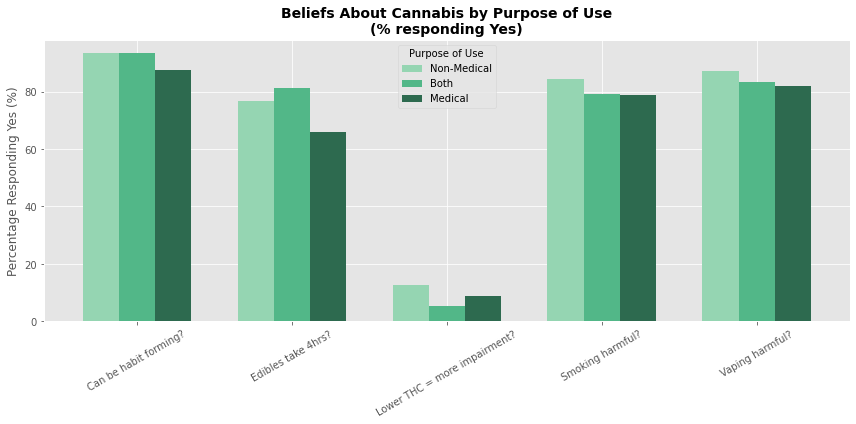

Figure 5 saved successfully


In [65]:
fig, ax = plt.subplots(figsize=(12, 6))

belief_cols = {
    'belief_smoke': 'Smoking harmful?',
    'belief_vapour': 'Vaping harmful?',
    'belief_edible': 'Edibles take 4hrs?',
    'belief_thc': 'Lower THC = more impairment?',
    'belief_habit': 'Can be habit forming?'
}

# Calculate % who answered YES (1) by purpose
belief_data = []
for col, label in belief_cols.items():
    for purpose in ['Non-Medical', 'Both', 'Medical']:
        group = df_users[df_users['purpose'] == purpose]
        # Percentage who said Yes
        pct = (group[col] == 1).sum() / group[col].notna().sum() * 100
        belief_data.append({
            'Belief': label,
            'Purpose': purpose,
            'Percentage': pct
        })

belief_df = pd.DataFrame(belief_data)

# Pivot and plot
belief_pivot = belief_df.pivot(index='Belief', columns='Purpose', values='Percentage')
belief_pivot = belief_pivot[['Non-Medical', 'Both', 'Medical']]

belief_pivot.plot(kind='bar', ax=ax,
                 color=['#95d5b2', '#52b788', '#2d6a4f'],
                 width=0.7)

ax.set_title('Beliefs About Cannabis by Purpose of Use\n(% responding Yes)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Percentage Responding Yes (%)')
ax.legend(title='Purpose of Use')
ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.savefig('fig5_beliefs_by_purpose.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure 5 saved successfully")

In [66]:
# Physical counts for beliefs by purpose
for col, label in belief_cols.items():
    print(f"\n{label}:")
    for purpose in ['Non-Medical', 'Both', 'Medical']:
        group = df_users[df_users['purpose'] == purpose]
        yes_count = int((group[col] == 1).sum())
        total = int(group[col].notna().sum())
        pct = (yes_count/total)*100 if total > 0 else 0
        print(f"  {purpose}: {yes_count} out of {total} ({pct:.1f}%)")


Smoking harmful?:
  Non-Medical: 2005 out of 2373 (84.5%)
  Both: 529 out of 669 (79.1%)
  Medical: 387 out of 491 (78.8%)

Vaping harmful?:
  Non-Medical: 2062 out of 2368 (87.1%)
  Both: 558 out of 670 (83.3%)
  Medical: 403 out of 492 (81.9%)

Edibles take 4hrs?:
  Non-Medical: 1819 out of 2374 (76.6%)
  Both: 545 out of 671 (81.2%)
  Medical: 327 out of 496 (65.9%)

Lower THC = more impairment?:
  Non-Medical: 298 out of 2377 (12.5%)
  Both: 36 out of 671 (5.4%)
  Medical: 43 out of 496 (8.7%)

Can be habit forming?:
  Non-Medical: 2218 out of 2375 (93.4%)
  Both: 627 out of 671 (93.4%)
  Medical: 435 out of 496 (87.7%)


## Finding 4 — Beliefs and Knowledge About Cannabis

Key knowledge gaps identified:

1. **Edible onset time** — only 65.9% of medical-only users correctly 
   know edibles can take up to 4 hours to take effect, compared to 
   81.2% of dual-purpose users. This represents a significant harm 
   reduction concern for medical patients who may re-dose too early.

2. **THC potency misconception** — fewer than 13% of users across all 
   groups correctly understand that lower THC does not necessarily 
   mean less impairment. This knowledge gap is consistent across 
   medical (8.7%), recreational (12.5%), and dual-purpose (5.4%) users.

3. **Smoking and vaping harm** — awareness is high across all groups 
   (79-87%), with non-medical users surprisingly scoring highest, 
   suggesting harm awareness alone does not deter recreational use.

4. **Habit formation** — near-universal awareness across all groups 
   (88-93%) that cannabis can be habit forming.

These findings have direct implications for cannabis education 
programs and medical practitioner guidance for patients.

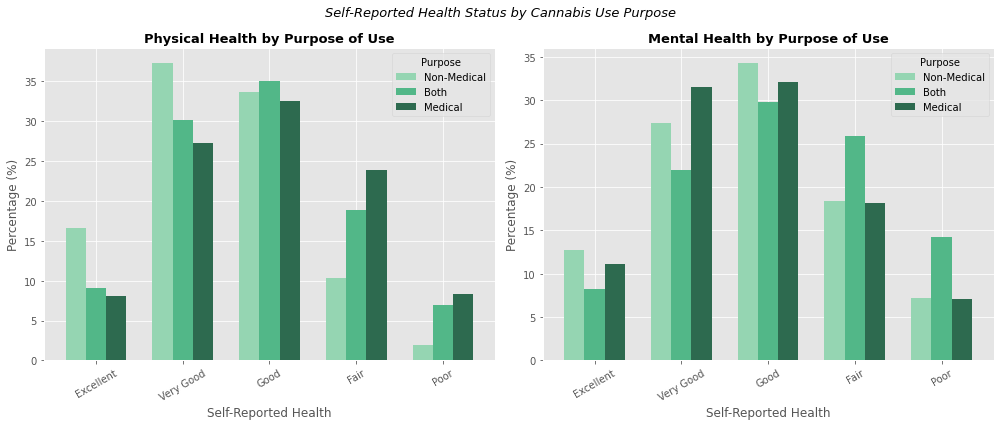

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

health_labels = {
    1: 'Excellent',
    2: 'Very Good', 
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}

for idx, (col, title) in enumerate([
    ('health_physical', 'Physical Health'),
    ('health_mental', 'Mental Health')
]):
    # Calculate percentage for each health level by purpose
    health_data = []
    for purpose in ['Non-Medical', 'Both', 'Medical']:
        group = df_users[df_users['purpose'] == purpose]
        for val, label in health_labels.items():
            pct = (group[col] == val).sum() / group[col].notna().sum() * 100
            health_data.append({
                'Health': label,
                'Purpose': purpose,
                'Percentage': pct
            })
    
    health_df = pd.DataFrame(health_data)
    health_pivot = health_df.pivot(index='Health', columns='Purpose', values='Percentage')
    health_pivot = health_pivot.reindex(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
    health_pivot = health_pivot[['Non-Medical', 'Both', 'Medical']]
    
    health_pivot.plot(kind='bar', ax=axes[idx],
                     color=['#95d5b2', '#52b788', '#2d6a4f'],
                     width=0.7)
    
    axes[idx].set_title(f'{title} by Purpose of Use',
                        fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Self-Reported Health')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Purpose')
    axes[idx].tick_params(axis='x', rotation=30)

plt.suptitle('Self-Reported Health Status by Cannabis Use Purpose',
             fontsize=13, style='italic')
plt.tight_layout()
plt.savefig('fig6_health_by_purpose.png', dpi=150, bbox_inches='tight')
plt.show()



In [68]:
# Physical counts for health status by purpose
for col, title in [('health_physical', 'Physical Health'), 
                    ('health_mental', 'Mental Health')]:
    print(f"\n{title}:")
    for purpose in ['Non-Medical', 'Both', 'Medical']:
        group = df_users[df_users['purpose'] == purpose]
        print(f"\n  {purpose}:")
        for val, label in health_labels.items():
            count = int((group[col] == val).sum())
            total = int(group[col].notna().sum())
            pct = (count/total)*100 if total > 0 else 0
            print(f"    {label}: {count} out of {total} ({pct:.1f}%)")


Physical Health:

  Non-Medical:
    Excellent: 396 out of 2376 (16.7%)
    Very Good: 886 out of 2376 (37.3%)
    Good: 801 out of 2376 (33.7%)
    Fair: 247 out of 2376 (10.4%)
    Poor: 46 out of 2376 (1.9%)

  Both:
    Excellent: 61 out of 668 (9.1%)
    Very Good: 201 out of 668 (30.1%)
    Good: 234 out of 668 (35.0%)
    Fair: 126 out of 668 (18.9%)
    Poor: 46 out of 668 (6.9%)

  Medical:
    Excellent: 40 out of 495 (8.1%)
    Very Good: 135 out of 495 (27.3%)
    Good: 161 out of 495 (32.5%)
    Fair: 118 out of 495 (23.8%)
    Poor: 41 out of 495 (8.3%)

Mental Health:

  Non-Medical:
    Excellent: 301 out of 2375 (12.7%)
    Very Good: 651 out of 2375 (27.4%)
    Good: 814 out of 2375 (34.3%)
    Fair: 437 out of 2375 (18.4%)
    Poor: 172 out of 2375 (7.2%)

  Both:
    Excellent: 55 out of 669 (8.2%)
    Very Good: 147 out of 669 (22.0%)
    Good: 199 out of 669 (29.7%)
    Fair: 173 out of 669 (25.9%)
    Poor: 95 out of 669 (14.2%)

  Medical:
    Excellent: 55 out

## Finding 5 — Health Status by Purpose of Use

**Physical Health:**
Medical-only users report the poorest physical health overall:
- Only 8.1% report excellent physical health vs 16.7% of non-medical users
- 32.1% report fair or poor physical health vs 12.3% of non-medical users
This is consistent with medical users treating serious physical 
conditions like chronic pain, arthritis and cancer.

**Mental Health — Unexpected Pattern:**
The dual-purpose (Both) group reports the poorest mental health:
- 14.2% report poor mental health vs 7.1% of medical-only users
- 25.9% report fair mental health vs 18.2% of medical-only users
This aligns with Finding 3 showing the Both group has significantly 
higher rates of anxiety (32.3%), depression (30.4%) and ADHD (20.2%),
suggesting cannabis plays a dual coping and recreational role for 
this group.

Notably, medical-only users report mental health comparable to 
non-medical users despite worse physical health, suggesting cannabis 
may be effectively managing their mental wellbeing alongside 
physical symptoms.

float64
NaN    2415
7.0     320
1.0     286
3.0     154
4.0     124
5.0     106
6.0      74
2.0      72
Name: use_freq_med, dtype: int64


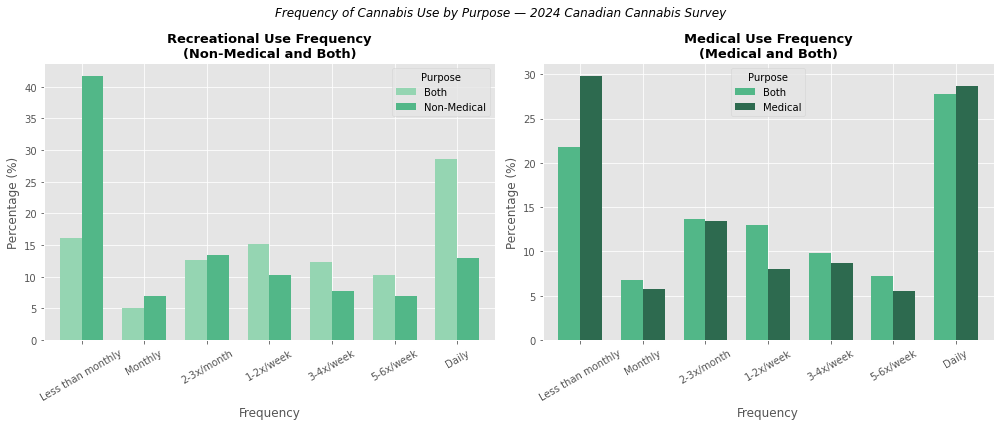

Figure 7 saved successfully


In [78]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

freq_labels = {
    1: 'Less than monthly',
    2: 'Monthly',
    3: '2-3x/month',
    4: '1-2x/week',
    5: '3-4x/week',
    6: '5-6x/week',
    7: 'Daily'
}

# Chart 1 — Recreational frequency (Non-Medical and Both)
freq_data_rec = []
for purpose in ['Non-Medical', 'Both']:
    group = df_users[df_users['purpose'] == purpose]
    total = group['use_freq_rec'].notna().sum()
    for val, label in freq_labels.items():
        pct = (group['use_freq_rec'] == val).sum() / total * 100
        freq_data_rec.append({
            'Frequency': label,
            'Purpose': purpose,
            'Percentage': pct
        })

rec_df = pd.DataFrame(freq_data_rec)
rec_pivot = rec_df.pivot(index='Frequency', columns='Purpose', values='Percentage')
rec_pivot = rec_pivot.reindex([
    'Less than monthly', 'Monthly', '2-3x/month',
    '1-2x/week', '3-4x/week', '5-6x/week', 'Daily'
])

rec_pivot.plot(kind='bar', ax=axes[0],
               color=['#95d5b2', '#52b788'],
               width=0.7)
axes[0].set_title('Recreational Use Frequency\n(Non-Medical and Both)',
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Percentage (%)')
axes[0].tick_params(axis='x', rotation=30)
axes[0].legend(title='Purpose')

# Chart 2 — Medical frequency (Medical and Both)
freq_data_med = []
for purpose in ['Medical', 'Both']:
    group = df_users[df_users['purpose'] == purpose]
    total = group['use_freq_med'].notna().sum()
    if total > 0:
        for val, label in freq_labels.items():
            pct = (group['use_freq_med'] == val).sum() / total * 100
            freq_data_med.append({
                'Frequency': label,
                'Purpose': purpose,
                'Percentage': pct
            })

med_df = pd.DataFrame(freq_data_med)
med_pivot = med_df.pivot(index='Frequency', columns='Purpose', values='Percentage')
med_pivot = med_pivot.reindex([
    'Less than monthly', 'Monthly', '2-3x/month',
    '1-2x/week', '3-4x/week', '5-6x/week', 'Daily'
])

med_pivot.plot(kind='bar', ax=axes[1],
               color=['#52b788', '#2d6a4f'],
               width=0.7)
axes[1].set_title('Medical Use Frequency\n(Medical and Both)',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Percentage (%)')
axes[1].tick_params(axis='x', rotation=30)
axes[1].legend(title='Purpose')

plt.suptitle('Frequency of Cannabis Use by Purpose — 2024 Canadian Cannabis Survey',
             fontsize=12, style='italic')
plt.tight_layout()
plt.savefig('fig7_frequency_by_purpose.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure 7 saved successfully")

In [79]:
# Frequency counts
for freq_col, label, purposes in [
    ('use_freq_rec', 'Recreational', ['Non-Medical', 'Both']),
    ('use_freq_med', 'Medical', ['Medical', 'Both'])
]:
    print(f"\n{label} Frequency:")
    for purpose in purposes:
        group = df_users[df_users['purpose'] == purpose]
        total = group[freq_col].notna().sum()
        print(f"\n  {purpose} (n={total}):")
        for val, flabel in freq_labels.items():
            count = int((group[freq_col] == val).sum())
            pct = (count/total)*100 if total > 0 else 0
            print(f"    {flabel}: {count} ({pct:.1f}%)")


Recreational Frequency:

  Non-Medical (n=2369):
    Less than monthly: 986 (41.6%)
    Monthly: 165 (7.0%)
    2-3x/month: 319 (13.5%)
    1-2x/week: 242 (10.2%)
    3-4x/week: 185 (7.8%)
    5-6x/week: 164 (6.9%)
    Daily: 308 (13.0%)

  Both (n=666):
    Less than monthly: 107 (16.1%)
    Monthly: 34 (5.1%)
    2-3x/month: 84 (12.6%)
    1-2x/week: 101 (15.2%)
    3-4x/week: 82 (12.3%)
    5-6x/week: 68 (10.2%)
    Daily: 190 (28.5%)

Medical Frequency:

  Medical (n=484):
    Less than monthly: 144 (29.8%)
    Monthly: 28 (5.8%)
    2-3x/month: 65 (13.4%)
    1-2x/week: 39 (8.1%)
    3-4x/week: 42 (8.7%)
    5-6x/week: 27 (5.6%)
    Daily: 139 (28.7%)

  Both (n=652):
    Less than monthly: 142 (21.8%)
    Monthly: 44 (6.7%)
    2-3x/month: 89 (13.7%)
    1-2x/week: 85 (13.0%)
    3-4x/week: 64 (9.8%)
    5-6x/week: 47 (7.2%)
    Daily: 181 (27.8%)


## Finding 6 — Frequency of Use by Purpose

**Medical Use Frequency:**
Medical-only users show slightly higher daily medical use than 
dual-purpose users, consistent with using cannabis as a regular 
therapeutic treatment for chronic conditions.

**Recreational Use Frequency:**
The dual-purpose (Both) group shows significantly higher daily 
recreational use compared to non-medical users. This suggests 
that individuals who use cannabis medically also tend to integrate 
recreational use more heavily into their daily routines.

This pattern is clinically relevant to cannabis use disorder research —
heavy recreational use among medical users may indicate a subset of 
patients where therapeutic and problematic use overlap, a key focus 
of the JHU Cannabis Science Laboratory's research on cannabinoid 
reward and reinforcement.

In [84]:
print(df_users['education3'].value_counts(dropna=False))

3.0    1247
1.0    1191
2.0    1086
NaN      27
Name: education3, dtype: int64


=== EDUCATION BY PURPOSE — COUNTS ===
Non-Medical | High School or Less: 790 (33.4%)
Non-Medical | Trades/College: 690 (29.2%)
Non-Medical | Bachelor's or More: 887 (37.5%)
Both | High School or Less: 259 (39.0%)
Both | Trades/College: 228 (34.3%)
Both | Bachelor's or More: 177 (26.7%)
Medical | High School or Less: 142 (28.8%)
Medical | Trades/College: 168 (34.1%)
Medical | Bachelor's or More: 183 (37.1%)


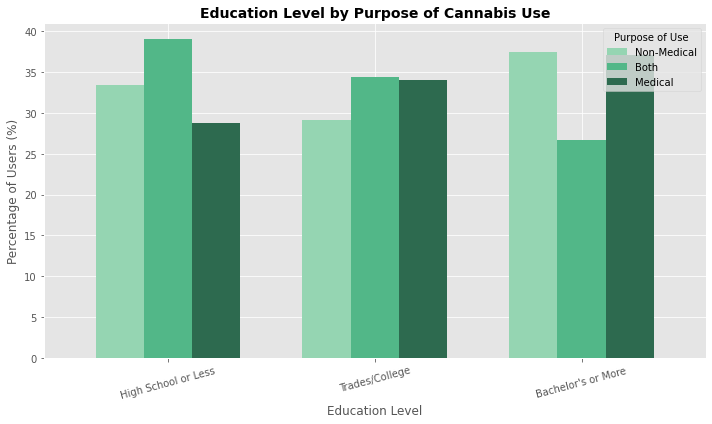


Figure 8 saved successfully


In [89]:
fig, ax = plt.subplots(figsize=(10, 6))

edu_labels = {
    1: 'High School or Less',
    2: 'Trades/College',
    3: "Bachelor's or More"
}

# Calculate percentage for each education level by purpose
edu_data = []
for purpose in ['Non-Medical', 'Both', 'Medical']:
    group = df_users[df_users['purpose'] == purpose]
    total = group['education3'].notna().sum()
    for val, label in edu_labels.items():
        count = int((group['education3'] == val).sum())
        pct = (count/total)*100 if total > 0 else 0
        edu_data.append({
            'Education': label,
            'Purpose': purpose,
            'Percentage': pct,
            'Count': count
        })

# Print physical counts
print("=== EDUCATION BY PURPOSE — COUNTS ===")
for item in edu_data:
    print(f"{item['Purpose']} | {item['Education']}: {item['Count']} ({item['Percentage']:.1f}%)")

# Plot
edu_df = pd.DataFrame(edu_data)
edu_pivot = edu_df.pivot(index='Education', columns='Purpose', values='Percentage')
edu_pivot = edu_pivot.reindex(['High School or Less', 'Trades/College', "Bachelor's or More"])
edu_pivot = edu_pivot[['Non-Medical', 'Both', 'Medical']]

edu_pivot.plot(kind='bar', ax=ax,
               color=['#95d5b2', '#52b788', '#2d6a4f'],
               width=0.7)

ax.set_title('Education Level by Purpose of Cannabis Use',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of Users (%)')
ax.legend(title='Purpose of Use')
ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('fig8_education_by_purpose.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure 8 saved successfully")

## Finding 6 — Education by Purpose
Medical and non-medical users have similar education profiles 
(~37% bachelor's or more). Dual-purpose users show lower 
educational attainment (26.7% bachelor's or more, 39% high 
school or less), consistent with broader socioeconomic factors 
that may influence both health outcomes and cannabis use patterns.